<a href="https://colab.research.google.com/github/hoangso8000/DevC-DataScience/blob/master/Week_2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resources

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [1]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read `Salaries.csv` as a dataframe called `sal`.**

In [2]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [3]:
sal.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [5]:
# Your Code 
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [8]:
# Your Code Here
print("Lowest amount of BasePay {}".format(min(sal['BasePay'])))
print("Highest amount of BasePay {}".format(max(sal['BasePay'])))

Lowest amount of BasePay -166.01
Highest amount of BasePay 319275.01


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [9]:
# Your Code Here
sal['OvertimePay'].mean()

5066.059886444622

In [10]:
# Your Code Here
min(sal['OvertimePay'])

-0.01

In [11]:
# Your Code Here
max(sal['OvertimePay'])

245131.88

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [17]:
# Your Code Here
sal[sal['EmployeeName'] == "JOSEPH DRISCOLL"]['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [14]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your Code Here
sal[sal['EmployeeName'] == "GARY JIMENEZ"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [27]:
# Your Code Here
josheph = sal[sal['EmployeeName'] == "JOSEPH DRISCOLL"]
# josheph_money = josheph['BasePay'] + josheph['OvertimePay'] + josheph['OtherPay']
josheph_earnings = josheph['TotalPayBenefits'].to_string(index = False)
print("JOSEPH DRISCOLL make {} $".format(josheph_earnings))
# print(josheph_earnings)

JOSEPH DRISCOLL make  270324.91 $


**What is the name of highest paid person (including benefits)?**

In [30]:
# Your Code Here
sal[sal['TotalPayBenefits'] == max(sal['TotalPayBenefits'])]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [31]:
# Your Code Here
sal[sal['TotalPayBenefits'] == min(sal['TotalPayBenefits'])]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

### His benefits were negative

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [39]:
# Your Code Here
sal['BasePay'].groupby(sal['Year'] <= 2014).mean()

Year
True    66325.448841
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [42]:
# Your Code Here
len(list(sal['JobTitle'].unique()))

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [45]:
# Your Code Here
sal['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [57]:
# Your Code Here
df  = sal[sal['Year'] == 2013]['JobTitle'].value_counts()
df.to_list().count(1)

202

**How many people have the word Chief in their job title?**

In [70]:
# Your Code Here
chief_job = sal[sal['JobTitle'].str.contains("Chief") == True]
chief_job

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco,NaN
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,NaN,San Francisco,NaN
36169,36170,Brendan Ward,"Battlion Chief, Fire Suppressi",174822.47,118215.58,28845.78,49648.09,321883.83,371531.92,2012,NaN,San Francisco,NaN
36170,36171,Samson Lai,"Battlion Chief, Fire Suppressi",174822.44,112731.28,28660.28,53249.56,316214.00,369463.56,2012,NaN,San Francisco,NaN
36171,36172,Rudy Castellanos,"Battlion Chief, Fire Suppressi",176771.74,124413.13,15803.39,52320.90,316988.26,369309.16,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138011,138012,Sharon C Jackson,Chief Deputy Adlt Probation Of,56660.18,0.00,0.00,566.61,56660.18,57226.79,2014,NaN,San Francisco,NaN
139620,139621,Anita S Lee,Chief Clerk,38598.86,0.00,0.00,386.00,38598.86,38984.86,2014,NaN,San Francisco,NaN
139709,139710,George D Vaughan,Chief Nursery Specialist,27319.47,483.90,0.00,10334.67,27803.37,38138.04,2014,NaN,San Francisco,NaN
140080,140081,Patrick W Gillespie,Chief Preparator,24091.00,0.00,0.00,10176.77,24091.00,34267.77,2014,NaN,San Francisco,NaN


## Data Visualization

**Implement seaborn's countplot with x='Year'**

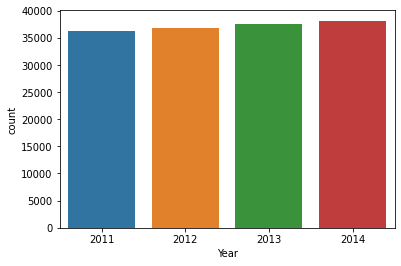

In [71]:
sns.countplot(x = "Year", data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

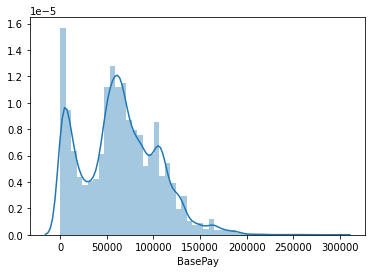

In [76]:
sns.distplot(sal[sal["Year"] == 2011]["BasePay"]);

**How about other Year**

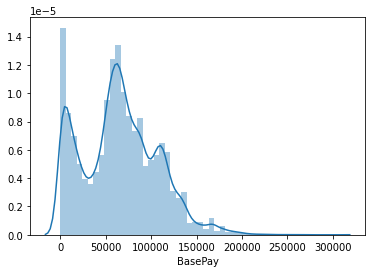

In [77]:
# Your Code Here for 2012
sns.distplot(sal[sal["Year"] == 2012]["BasePay"]);

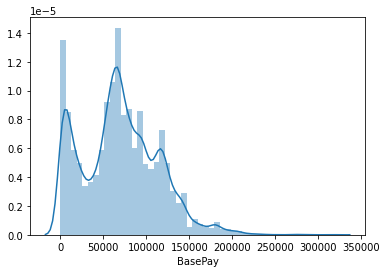

In [78]:
sns.distplot(sal[sal["Year"] == 2013]["BasePay"]);# Your Code Here for 2013

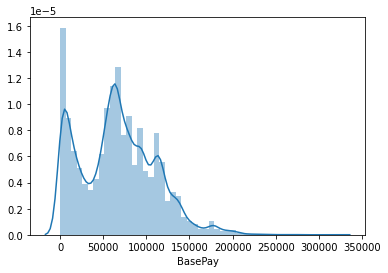

In [79]:
# Your Code Here for 2014
sns.distplot(sal[sal["Year"] == 2014]["BasePay"]);

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

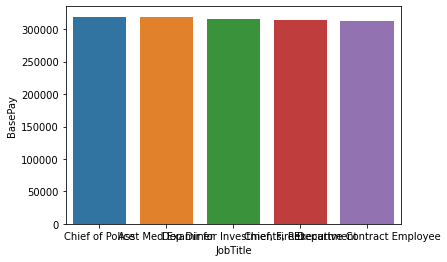

In [103]:
# Your Code Here
top5_basepay = sal.nlargest(5,['BasePay'])
sns.barplot(x = top5_basepay['JobTitle'], y = top5_basepay['BasePay'])

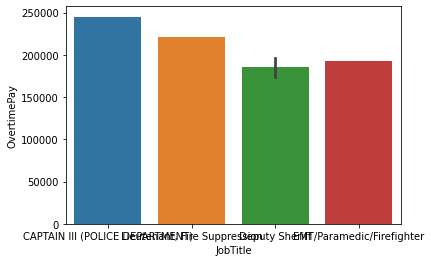

In [104]:
# Your Code Here
top5_otp = sal.nlargest(5,['OvertimePay'])
sns.barplot(x = top5_otp['JobTitle'], y = top5_otp['OvertimePay'])

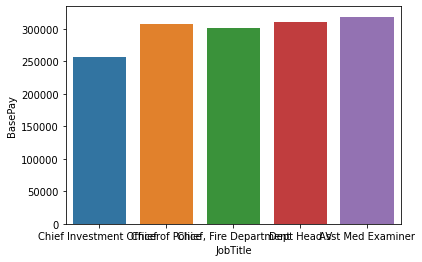

In [105]:
top5_bnf = sal.nlargest(5,['Benefits'])
sns.barplot(x = top5_bnf['JobTitle'], y = top5_bnf['BasePay'])

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

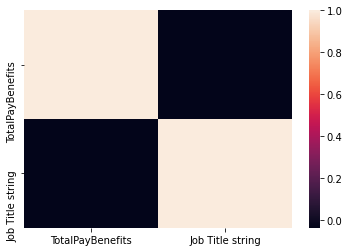

In [97]:
# Your Code Here
sal['Job Title string'] = sal['JobTitle'].str.len()
# sal = sal['TotalPayBenefits']['Job Title string']
# # cor = sal.corr()
# # sns.heatmap(cor)
# sal
df = sal[['TotalPayBenefits','Job Title string']]
cor = df.corr()
sns.heatmap(cor)

# Great Job!